# Homework on Accept-Reject Sampling

Suppose $X$ is a random variable that follows a half-normal distribution $N^+(0,2)$. Write an accept-reject program that uses the exponential distribution $Exp(2)$ as the proposal distribution to draw samples from $X$. The challenge is to find the value of `m`. 


## Draw the density plots of $X$ and $Exp(2)$ to visually inspect the distributions. What is the range in the values of $X$ that `m` is most likely to occur?


## Write a program that calculates `m`. 
Hint: An _exact_ solution may be difficult and so an approximated value is enough. 


## Write an accept-reject sampling program for $X$ and use it to draw a random sample of 100,000 values.


## Draw a histogram of the sample and overlay it with the theoretical density. Calculate the mean and the variance of the sample and compare them to the theoretical values. Are they close?

In [9]:
using Pkg
#Pkg.add("ForwardDiff")
Pkg.add("Roots")

   Resolving package versions...
   Installed Setfield ───────── v1.1.1
   Installed CommonSolve ────── v0.2.3
   Installed ConstructionBase ─ v1.5.1
   Installed Roots ──────────── v2.0.10
    Updating `C:\Users\d3m2w\.julia\environments\v1.8\Project.toml`
  [f2b01f46] + Roots v2.0.10
    Updating `C:\Users\d3m2w\.julia\environments\v1.8\Manifest.toml`
  [38540f10] + CommonSolve v0.2.3
  [187b0558] + ConstructionBase v1.5.1
  [f2b01f46] + Roots v2.0.10
  [efcf1570] + Setfield v1.1.1
Precompiling project...
  ✓ CommonSolve
  ✓ ConstructionBase
  ✓ Setfield
  ✓ Roots
  4 dependencies successfully precompiled in 6 seconds. 203 already precompiled.


In [10]:
using Distributions, Plots, StatsPlots, StatsFuns, Roots, ForwardDiff

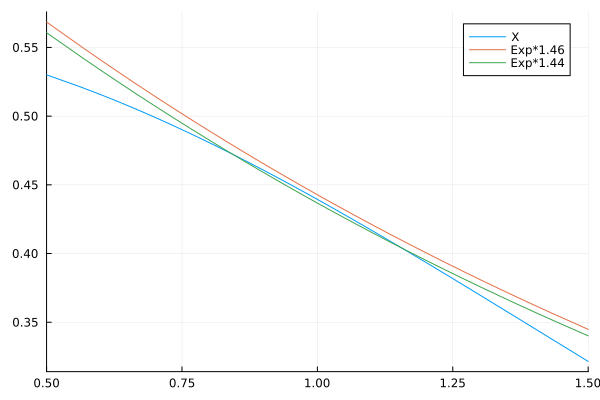

In [11]:
#1.1
plot(x -> pdf(Truncated(Normal(0, sqrt(2)), 0, Inf),x),lw = 1,xlims = (0.5,1.5),label = "X")
plot!(x -> 1.46 * pdf(Exponential(2),x),lw = 1,xlims = (0.5,1.5),label = "Exp*1.46")
plot!(x -> 1.44 * pdf(Exponential(2),x),lw = 1,xlims = (0.5,1.5),label = "Exp*1.44")
# Near 1.

M = 1.448867530211582

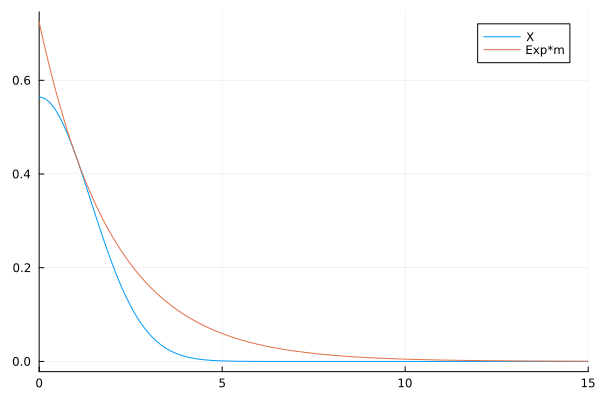

In [12]:
#1.2
D(f) = x -> ForwardDiff.derivative(f,float(x))
exp(x) = pdf(Exponential(2),x)
halfnorm(x) = pdf(Truncated(Normal(0, sqrt(2)), 0, Inf),x)
f(x) = exp(x)/halfnorm(x)
x = fzero(D(f),0.9)
findM(m) = m * exp(x) - halfnorm(x)
M = fzero(findM,1)
print("M = ",M)
plot(x -> pdf(Truncated(Normal(0, sqrt(2)), 0, Inf),x),lw = 1,xlims = (0.0,15),label = "X")
plot!(x -> M * pdf(Exponential(2),x),lw = 1,xlims = (0.0,15),label = "Exp*m")

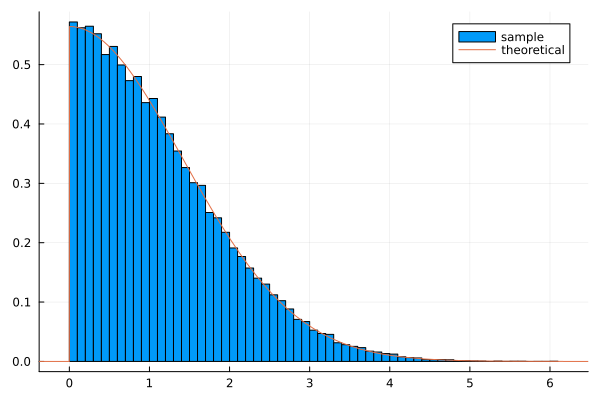

In [13]:
#1.3, 1.4
Y = [0.0]
f(x) = pdf(Truncated(Normal(0, sqrt(2)), 0, Inf),x)
Mexp(x) = M*pdf(Exponential(2),x)
for i in 1:100000
    xtmp = rand(Exponential(2))
    ytmp = rand(Uniform(0,Mexp(xtmp)))
    if ytmp <= f(xtmp)
        append!(Y,xtmp)
    end
end
histogram(Y,normalize = true,label = "sample")
plot!(x -> pdf(Truncated(Normal(0, sqrt(2)), 0, Inf),x),lw = 1,xlims = xlims(),label = "theoretical")


In [14]:
theo_mean = sqrt(2)*sqrt(2/π)
theo_var = 2 * (1 - 2/π)
print(theo_mean," ", theo_var,"\n")
print(mean(Y)," ",var(Y),"\n")

1.1283791670955128 0.7267604552648372
1.1314397502537616 0.7381890353351538
